# Warming

In [43]:
# imports
from importlib import reload

import numpy as np
from scipy.interpolate import interp1d

import pandas

from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

import seaborn as sns

from siosandbox.cugn import clusters
from siosandbox.cugn import grid_utils
from siosandbox.cugn import io as cugn_io
from siosandbox import plot_utils

from gsw import conversions, density
import gsw

# Load

In [4]:
line = '90'

# Load
items = cugn_io.load_line(line)
grid_tbl = items['grid_tbl']
ds = items['ds']

# Fill
grid_utils.fill_in_grid(grid_tbl, ds)

# Quick stats

In [7]:
highSO = grid_tbl.SO > 1.05

In [8]:
highSO_tbl = grid_tbl[highSO]

In [10]:
np.nanmedian(highSO_tbl.SA),  np.nanmedian(highSO_tbl.CT) 

(33.66594681984536, 16.14458515958494)

# SO curve

## Static items

In [12]:
lat = np.nanmedian(ds.lat.data)
lon = np.nanmedian(ds.lon.data)
z = 10.

p = conversions.p_from_z(-z, lat)
SA = 33.7

## OC

In [37]:
CTs = np.linspace(12., 25., 100)
OCs = gsw.O2sol(SA, CTs, p, lon, lat)

## OC plot

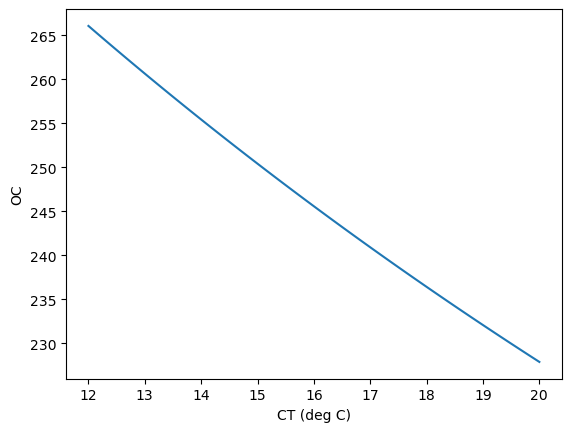

In [30]:
plt.clf()
ax = plt.gca()

ax.plot(CTs, OCs)
ax.set_xlabel('CT (deg C)')
ax.set_ylabel('OC')

plt.show()

## Interpolate

In [31]:
f_T_OC = interp1d(CTs, OCs)
f_OC_T = interp1d(OCs, CTs)

# SO vs DO

In [32]:
doxys = np.linspace(240., 265., 100)
SO1_Ts = f_OC_T(doxys)
SO1_Ts[0:10]

array([17.19920422, 17.14372858, 17.0883406 , 17.03310681, 16.97796722,
       16.9229136 , 16.86800244, 16.813195  , 16.75847184, 16.70388225])

## Add 1C

In [34]:
T1_Ts = SO1_Ts + 1.
T1_OCs = f_T_OC(T1_Ts)
T1_SOs = doxys / T1_OCs

## Figure

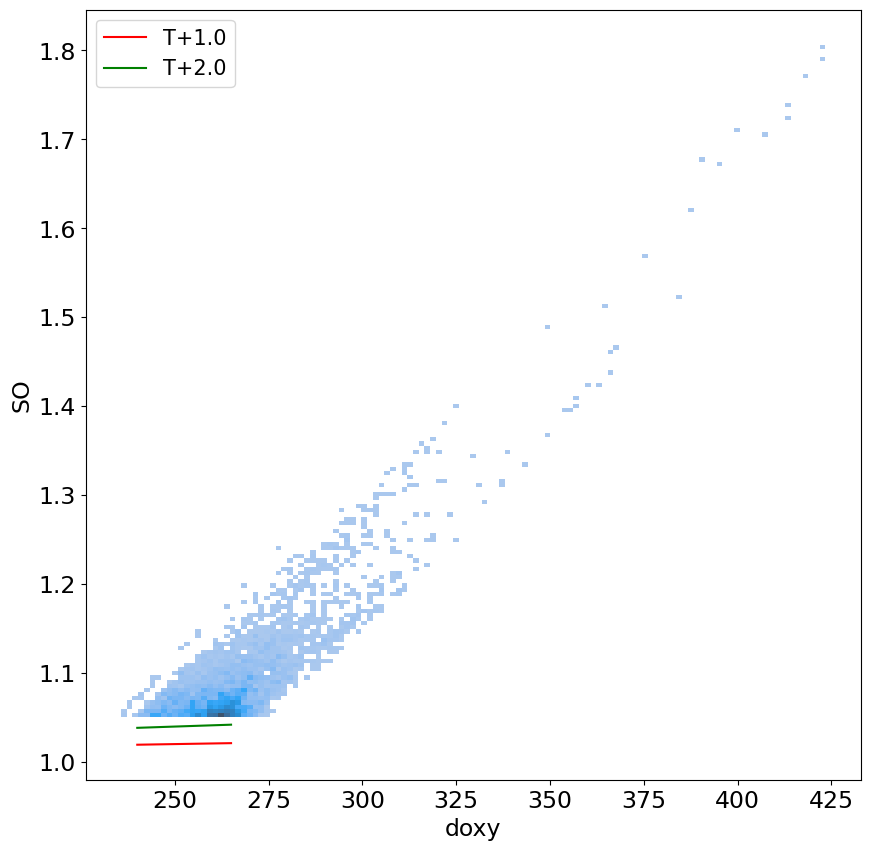

In [44]:
fig = plt.figure(figsize=(10,10))
plt.clf()
ax = plt.gca()

sns.histplot(highSO_tbl, x='doxy', y='SO', ax=ax)

# T1
for DT, clr in zip([1., 2.], ['r', 'g']):
    DT_Ts = SO1_Ts + DT
    DT_OCs = f_T_OC(DT_Ts)
    DT_SOs = doxys / DT_OCs
    ax.plot(doxys, DT_SOs, color=clr, label=f'T+{DT}')

ax.legend(loc='upper left', fontsize=15.)

plot_utils.set_fontsize(ax, 17.)

plt.show()